In [186]:
import numpy as np 
import pandas as pd


In [187]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [188]:

df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [189]:
df.shape

(5572, 5)

In [190]:
#1- Data Cleaning
#2- EDA
#3- Text Preprocessing 
#4- Model Building 
#5- Evalution
#6- Improvement 
#7 - Website 

# 1- Data Cleaning

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [192]:
#Here column 2 , 3 ,4  are of no use , so removing it

df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [193]:
df.sample(5)

,v1,v2
2957,spam,U have a secret admirer. REVEAL who thinks U R...
732,ham,Lol you won't feel bad when I use her money to...
4729,ham,I dont know ask to my brother. Nothing problem...
264,ham,Why you Dint come with us.
3533,ham,Good evening! How are you?


In [194]:
#Renaming the columns

df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [195]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [196]:
#Changing the target to 0 and 1

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [197]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [198]:
df['target']=encoder.fit_transform(df['target'])

In [199]:
df.head()   #ham = 0 #spam = 1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [200]:
#Missing values 

df.isnull().sum()

target    0
text      0
dtype: int64

In [201]:
#Duplicated  values 

df.duplicated().sum()

403

In [202]:
#Drop duplicate values 

df = df.drop_duplicates(keep= 'first')

In [203]:
df.duplicated().sum()

0

# 2- EDA (EXPLORATORY DATA ANALYSIS)

In [204]:
#Check how many spam msgs are there 
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [205]:
import matplotlib.pyplot as plt

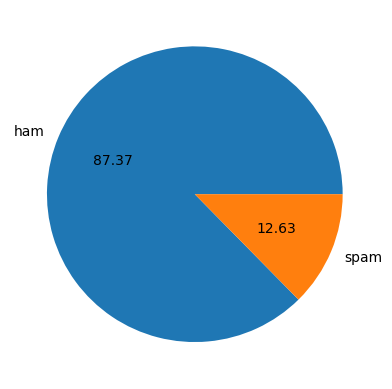

In [206]:
plt.pie(df['target'].value_counts(),labels=('ham','spam'),autopct='%0.2f')
plt.show()

In [207]:
#Data Is Imbalanced



In [208]:
import nltk

In [209]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sanya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [210]:
#Counting the number of words

df['num_characters'] = df['text'].apply(len)

In [211]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [212]:
#num  of words

df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [213]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [214]:
#Num Of Sentences 

df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [215]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [216]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [217]:
#Only for HAM messages 

df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [218]:
#Only For SPAM meassages

df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [219]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

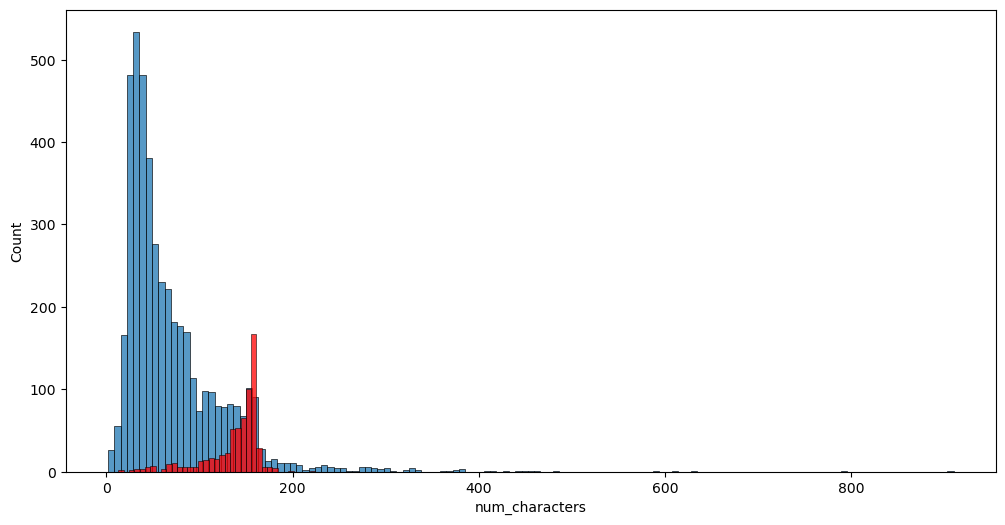

In [220]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color = 'red')

### Here we can see that spam messages has more number of words used than normal message

<Axes: xlabel='num_words', ylabel='Count'>

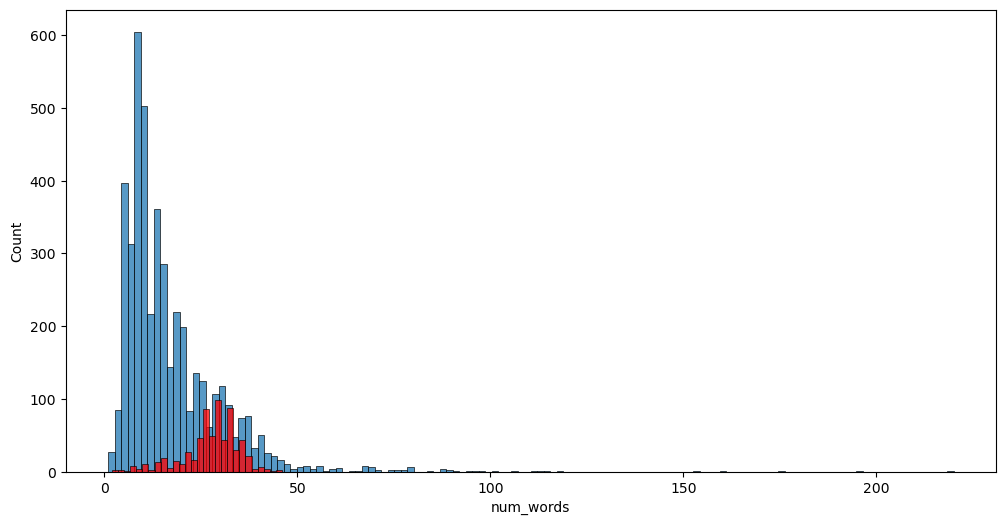

In [221]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color = 'red')

### Here also we can observe the same thing that the spam messages are made of more number of words than normal message

C:\Users\sanya\AppData\Local\Temp\ipykernel_5660\2221401063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

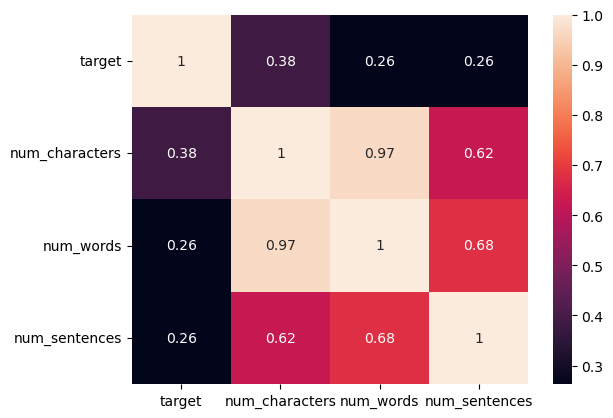

In [222]:
sns.heatmap(df.corr(),annot = True)

### Here in the heatmap we can see that  num_characters, num_words, num_sentences are strongly correlated , so we cant keep three of them , now only taking num_characters ahead .

# 3 - DATA PREPROCESSING 

* Lower case.
* Tokenization.
* Removing Special characters.
*  Removing Stop words and punctuation .
* Stemming

In [223]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [224]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #removing special characters 
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    #removing stopwords and punctuations
    text = y[:]
    y.clear()
    for i in text:
        if i  not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    #Stemming 
    text = y[:]
    y.clear()
    
    for i in text:
            y.append(ps.stem(i))
        
    return ''.join(y)    

In [225]:
transform_text('Hi HOW ARE %% YOU ! Mousami , you were singing')

['hi', 'mousami', 'sing']

In [226]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [227]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [228]:
df['transformed_text']=df['text'].apply(transform_text)

In [166]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [229]:
#let's make the world cloud

from wordcloud import WordCloud 

wc  = WordCloud(width =50,height =50,min_font_size=10,background_color='white')


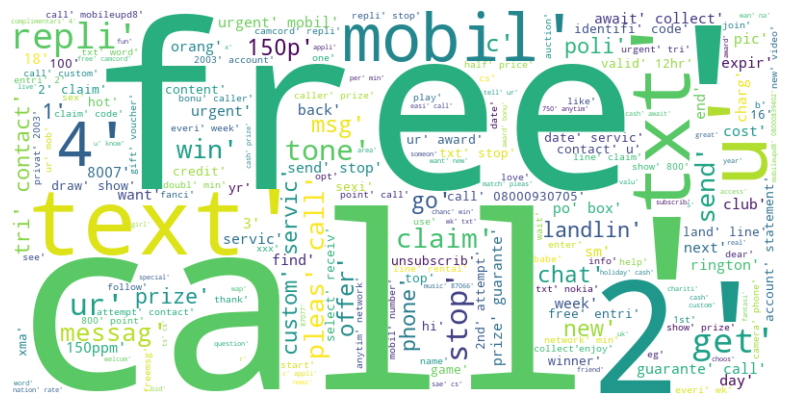

In [230]:
#FOR SPAM MESSAGES

text_data = df[df['target'] == 1]['transformed_text'].astype(str).str.cat(sep='')

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

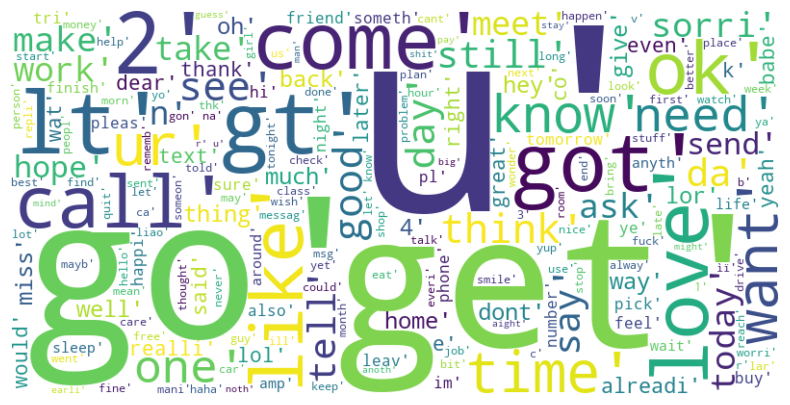

In [231]:
#FOR HEM MESSAGES

text_data = df[df['target'] == 0]['transformed_text'].astype(str).str.cat(sep='')

# Generate the word cloud
wc = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [232]:
# To find the  words that are mostly used 

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    if isinstance(msg, str):  # Check if msg is a string
        for word in msg.split():
            spam_corpus.append(word)
    elif isinstance(msg, list):  # Check if msg is a list
        for sublist in msg:
            for word in sublist.split():
                spam_corpus.append(word)
            

In [233]:
len(spam_corpus)

9939

In [234]:
from collections import Counter



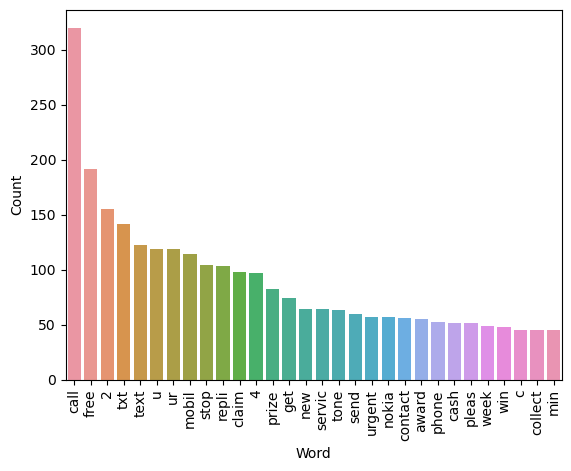

In [235]:

spam_counter = Counter(spam_corpus).most_common(30)
df_new = pd.DataFrame(spam_counter, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=df_new)
plt.xticks(rotation ='vertical')
plt.show()

### So , these are the top 30 words that are maximum used in spam messages .

# 4-Model Building 

In [257]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [237]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [239]:
df['transformed_text'] = df['transformed_text'].astype(str)
X = cv.fit_transform(df['transformed_text']).toarray()


In [242]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [244]:
X.shape

(5169, 6708)

In [245]:
y = df['target'].values

In [246]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [247]:
from sklearn.model_selection import train_test_split


In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [251]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [252]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [254]:
gnb.fit(X_train,y_train)

y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [255]:
mnb.fit(X_train,y_train)

y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [256]:
bnb.fit(X_train,y_train)

y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [259]:
print('-------------------------------------------------------------------------------------------------------------')

-------------------------------------------------------------------------------------------------------------


In [258]:
df['transformed_text'] = df['transformed_text'].astype(str)
X = tfid.fit_transform(df['transformed_text']).toarray()

In [260]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [261]:
X.shape

(5169, 6708)

In [262]:
y = df['target'].values

In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [264]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [265]:
gnb1.fit(X_train,y_train)

y_pred1 = gnb1.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [266]:
mnb1.fit(X_train,y_train)

y_pred2 = mnb1.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [267]:
bnb1.fit(X_train,y_train)

y_pred3 = bnb1.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


## So , the best model is - tfif -- MNB

### Now , let's bring all the machine learning alogorithms and check the accuracy 


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/99.8 MB 1.8 MB/s eta 0:00:55
   ---------------------------------------- 0.5/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.8/99.8 MB 4.5 MB/s eta 0:00:23
    --------------------------------------- 1.4/99.8 MB 6.3 MB/s eta 0:00:16
    --------------------------------------- 2.2/99.8 MB 7.7 MB/s eta 0:00:13
   - -------------------------------------- 2.8/99.8 MB 8.6 MB/s eta 0:00:12
   - -------------------------------------- 3.5/99.8 MB 9.4 MB/s eta 0:00:11
   - -------------------------------------- 4.2/99.8 MB 9.9 MB/s eta 0:00:10
   - ---------------------------------

In [271]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 


In [288]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc =KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc =RandomForestClassifier(n_estimators=50,random_state=2)
abc =AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [289]:
clfs = {
    'SVC' : svc,
    'KNN':knc,
    'Multinomial':mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BC':bc,
    'ExtraTree':etc,
    'GB': gbdt,
    'XGB': xgb
   
}

In [290]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy =accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [291]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [296]:
### Making of loop for evaluating all the algorithms ans storing the accuracy score and precision score 


from sklearn.metrics import accuracy_score, precision_score

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    
    
    print('For', name)
    print('Accuracy - ', current_accuracy)
    print('Precision - ', current_precision)
    
    # Append accuracy and precision scores to the lists
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

        

For SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For KNN
Accuracy -  0.9003868471953579
Precision -  1.0
For Multinomial
Accuracy -  0.9593810444874274
Precision -  1.0
For DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For LR
Accuracy -  0.9477756286266924
Precision -  0.9883720930232558
For RF
Accuracy -  0.971953578336557
Precision -  1.0
For AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For BC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For ExtraTree
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For GB
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For XGB
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [300]:
import pandas as pd

# Assuming clfs, accuracy_scores, and precision_scores are lists
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)

In [301]:
performance_df

,Algorithm,Accuracy,Precision
1,KNN,0.900387,1.000000
2,Multinomial,0.959381,1.000000
5,RF,0.971954,1.000000
4,LR,0.947776,0.988372
8,ExtraTree,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,XGB,0.972921,0.943548
9,GB,0.952611,0.923810
7,BC,0.958414,0.862595


## Here after examing all the algorithms we came to know that Multinomial  giving us the the accuracy and precision score . Now deploying the model



In [302]:
import pickle
pickle.dump(tfid,open('Vectorizer.pkl','wb'))
pickle.dump(mnb1,open('model.pkl','wb'))